In [2]:
# Import get_engine function from sql_functions.py and set it to a variable called engine
# Import all necessary libraries
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files
import sqlalchemy
from sql_functions import get_engine 

In [3]:
# Import the Information about the schema & table name
schema = 'capstone_wildfire' 
table_name = 'combined_weather_data_v4'
engine = get_engine()

# Get fire_data as WF & weather_data as DF

In [8]:
# SQL-Abfrage, um Daten aus der Tabelle zu laden
sql_query = "SELECT * FROM capstone_wildfire.combined_weather_data_v4"

# Daten aus der Datenbank abrufen und in ein DataFrame laden
df = pd.read_sql_query(sql_query, engine)

# DataFrame anzeigen
print(df)

             date  average_temp_c  minimum_temp_c  maximum_temp_c  \
0      1996-10-13             NaN             NaN             NaN   
1      2010-11-18            19.3            12.8            27.8   
2      1996-08-01             NaN             NaN             NaN   
3      1996-08-10             NaN             NaN             NaN   
4      1996-08-11             NaN             NaN             NaN   
...           ...             ...             ...             ...   
550409 1996-10-04             NaN             NaN             NaN   
550410 1997-02-27             NaN             NaN             NaN   
550411 1996-07-20             NaN             NaN             NaN   
550412 1996-07-24             NaN             NaN             NaN   
550413 2010-11-17            18.2            11.1            26.7   

        precipitation_mm  snow_mm  wind_direction_deg  windspeed_kmh  \
0                    NaN      NaN                 NaN            NaN   
1                    0.0   

In [5]:
import pandas as pd

# CSV Files aus weather_and_wildfires.ipynb laden
wf = pd.read_csv('wild_fire_df.csv')

In [6]:
wf['combined_control_date'] = pd.to_datetime(wf['combined_control_date'])
wf['combined_discovery_date'] = pd.to_datetime(wf['combined_discovery_date'])

In [12]:
# # SQL-Abfrage, um Daten aus der Tabelle zu laden
# sql_query_wf = "SELECT * FROM capstone_wildfire.fires_data_v1_rdy_to_clean_rows"

# # Daten aus der Datenbank abrufen und in ein DataFrame laden
# wf = pd.read_sql_query(sql_query_wf, engine)

# # DataFrame anzeigen
# wf

To perform the statistical analysis on the given datasets using numpy, you can follow these steps:
Step 1: Import the required libraries
import numpy done


In [19]:
from scipy.stats import pearsonr, spearmanr, linregress, f_oneway


In [9]:
# Assuming 'date' column in df is not datetime, convert it to datetime
df['date'] = pd.to_datetime(df['date'])

In [10]:
# Group 'df' data by 'date' and calculate the daily average temperature
df_avg_temp = df.groupby(df['date'].dt.date)['average_temp_c'].mean().reset_index()

In [11]:
# Select the 'average_temp_c' column from the weather dataset
df_avg_temp = df_avg_temp[['date', 'average_temp_c']]

In [12]:
# Create a new column 'day' by extracting the day from the date
wf['day'] = wf['combined_discovery_date'].dt.date


In [13]:
# Count the number of unique wildfires discovered on each day
wf_agg = wf.groupby('day')['unique_id'].nunique().reset_index()
wf_agg.columns = ['Day', 'Number of Wildfires']


In [14]:
# Merge daily average temperature and wildfire data on the 'Day' column
merged_data = pd.merge(df_avg_temp, wf_agg, left_on='date', right_on='Day')

#This code will give you one 'weather data point' per day with the daily average temperature 
#for all 71 weather stations and the corresponding number of wildfires discovered on each day. 
#This merged data can then be used for Pearson Correlation analysis.

- wetterstationen, 71 insgesamt, 71 wetterstionen  seperat berechnet (das ist das problem )

In [15]:
# Remove rows with missing values (NaN) in either column
merged_data = merged_data.dropna(subset=['average_temp_c', 'Number of Wildfires'])

VISUALISIERUNG THE RESULT:

In [16]:
import matplotlib.pyplot as plt

In [17]:
# Assuming you have calculated the correlation coefficient and p-value
corr_coefficient = 0.297  
p_value = 1.216

Here's the code to create a grouped bar plot that displays both the correlation coefficient and the p-value:

VISUALIZATION OF THE # Calculate the Pearson correlation coefficient and p-value
#corr_coefficient, p_value = stats.pearsonr(merged_data['average_temp_c'], merged_data['Number of Wildfires'])

# diese berechnung als plot , scata plot


To visualize the Pearson correlation coefficient and p-value using a scatter plot in Python, you can create a scatter plot with the correlation coefficient on one axis and the negative logarithm (base 10) of the p-value on the other axis. This is a common approach to visualize correlation strength and statistical significance. Here's how you can do it.
In this code, we calculate the negative logarithm (base 10) of the p-value to visualize its significance more effectively. The scatter plot shows the relationship between the correlation coefficient and the significance of the correlation.

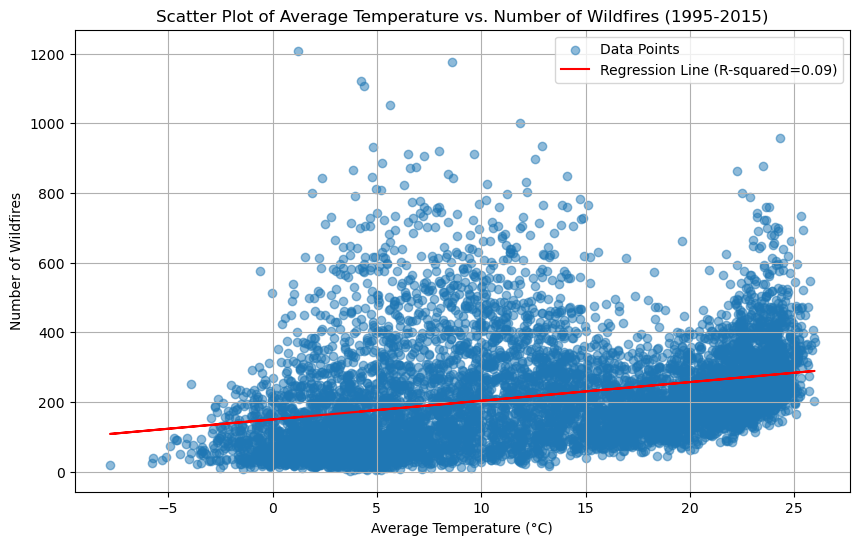

In [26]:
# Creating a Scatterplot
plt.figure(figsize=(10, 6))
x = merged_data['average_temp_c']
y = merged_data['Number of Wildfires']

# Creating the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(x, y, label='Data Points', alpha=0.5)
plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title('Scatter Plot of Average Temperature vs. Number of Wildfires (1995-2015)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Wildfires')
plt.legend()
plt.grid(True)
plt.show()

NEW DIAGRAM 2.10.23


In [21]:

# Create new DataFrame from merged_df
average_temp_c_rounded = merged_data[['date', 'average_temp_c', 'Number of Wildfires']] 

# Round temperatures to nearest integer
average_temp_c_rounded['average_temp_c_rounded'] = average_temp_c_rounded['average_temp_c'].round().astype(int)

# Groupby rounded temperature and sum fire counts
average_temp_c_rounded = average_temp_c_rounded.groupby('average_temp_c_rounded')['Number of Wildfires'].sum().reset_index()

# Rename columns
average_temp_c_rounded.rename(columns={
    'average_temp_c_rounded': 'temp_c', 
    'Number of Wildfires': 'total_fires'
}, inplace=True)
average_temp_c_rounded

,temp_c,total_fires
0,-8,19
1,-6,63
2,-5,429
3,-4,668
4,-3,2878
5,-2,7174
6,-1,12315
7,0,17936
8,1,32387
9,2,41932


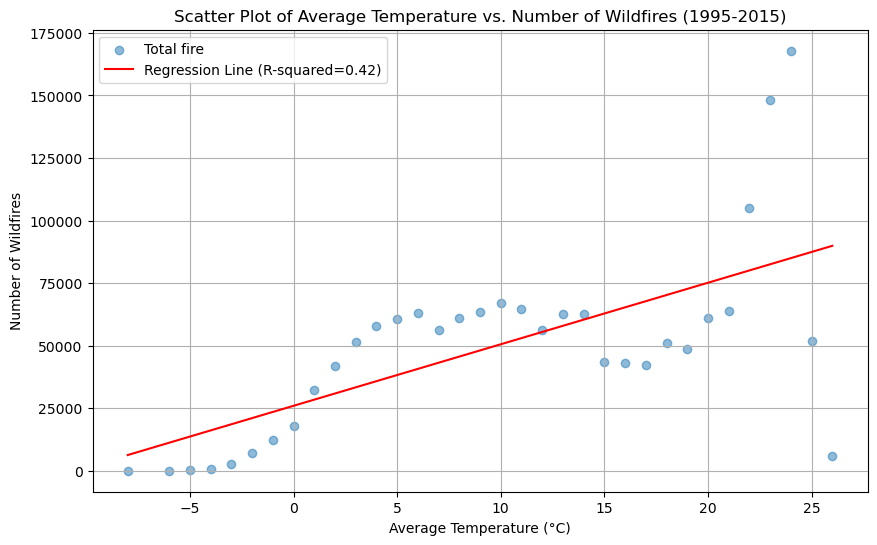

In [25]:


# Streudiagramm mit einer Regressionslinie erstellen
plt.figure(figsize=(10, 6))
x = average_temp_c_rounded['temp_c']
y = average_temp_c_rounded['total_fires']

# Berechnung der Regressionslinie
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(x, y, label='Total fire', alpha=0.5)
plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title('Scatter Plot of Average Temperature vs. Number of Wildfires (1995-2015)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Wildfires')
plt.legend()
plt.grid(True)
plt.show()